<a href="https://colab.research.google.com/github/11daniel/CSINTSY/blob/main/MC03_Machine_Learning_(Classification)_Board_Exam_%5Bwith_CM%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Title Header](https://drive.google.com/uc?id=1-caGfsGWaoPm3KURwuoSzZMaI10cCABG)


# ***Introduction***

Artificial Intelligence (AI) is an intelligent system that aims to train a
machine to perform a task with human-like intelligence. Some applications of AI are Machine Learning, Natural Language Processing (NLP), Expert Systems, Speech Recognition, Vision and Robotics. In this machine problem, the group is focused on Machine Learning.

Machine Learning was made possible with data being the vital component in Artificial Intelligence. According to Humby (2006), data is the new oil, but this will not be useful in its raw state. It needs to be refined, processed and turned into something useful. Data can come in various forms, like numerical (measurements) or categorical (observations). This data is turned into a dataset, which Machine Learning then uses to train a model.

As data is vital to learning patterns and relationships between input (feature) and output (label), Machine Learning should perform (1) Data Acquisition, (2) Exploratory Data Analysis, (3) Feature Extraction, and (4) Insights. The said process is needed to ensure that the data consumed by the system provides a valuable output.

![ML Flow](https://drive.google.com/uc?id=1-eMweyEnGcQ8EOkbJoq17QcWTuEdDswP)

Machine Learning also comes in different forms, such as classification, regression, or clustering. This program primarily focused on the classification task, which uses labeled data comprised of features and labels. This data will be divided randomly to train the model using a training set and evaluate the model's performance using a testing set.


---
# **I. Data Acquisition**

The first part in building a machine-learning model is to acquire the raw data from a reliable source. The group decided to obtain a dataset from Kaggle pertaining the performance of students in an exam. According to Prasad (2019), the Kaggle dataset consist of exam marks in six subjects with total marks, result and division as an extra columns. The column, 'result' will be used as an indication whether a student passed (1) or failed (0) the exam.


## **Use Case: Board Exam Results**

*Kaggle Dataset:* https://www.kaggle.com/datasets/jayantiprasad/student-exam-results-dataset/code

> **Dataset:** The board exam conducted by the Professional Regulation Commission (PRC) can assess the performance of each subjects the exam taker must take in order to pass. The difficulty of a subject can be based on the overall performance of the exam takers who took the exam. In this Kaggle dataset, there are 1000 exam takers who took the following subjects: Hindi, English, Science, Math, History, and Geography. Each subject also has a score of 100.

> **Pre-Processing:** To make it more realistic, let's convert the Kaggle dataset subjects with Electronics Engineering (ECE) Board Exam subjects, which are Mathematics (MATH), Electronics (ECE), Electronic Systems and Technologies (EST), and General Engineering and Applied Science (GEAS - Engineering, Science, Constitutions). In order to pass the board exam and obtain an Electronics Engineering license regulated by PRC, the exam takers should have atleast 70% of the total score.

> **Assessment:** With the available dataset, the PRC board committee can assess the number of exam takers who passed the exam as well as which subject the exam takers had failed. This may also be used to predict the difficulty of the ECE Board Exam and check whether the exam syllabus should be updated that may also review centers to improve their classes.



## **General Configuration**

> **Scikit Learn** is used in this machine problem to import the neccessary modules needed to perform the classification task. This module is also normally used in the data industry (particularly the data science field), to perform Machine Lerning algorithm with the available data.

> *Note that **Pandas and NumPy** modules were also use in the Exploratory Data Analysis (EDA) while <br> **Seaborn and Matplotlib** modules were used for the Insights.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Kaggle dataset was uploaded in Google Drive
from google.colab import drive
drive.mount('/content/drive')

# The directory of the exam dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/'

df_kaggle_tmp = pd.read_csv(data_dir+'exam_results.csv', index_col=0, sep=",")
df_kaggle_tmp.head()

Mounted at /content/drive


,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,65,10,59,3,71,37,245,0,3
1,94,56,4,67,91,50,362,1,1
2,7,85,76,99,60,25,352,0,2
3,88,46,59,94,52,38,377,1,1
4,39,81,37,38,6,54,255,1,3


---
# **II. Exploratory Data Analysis (EDA)**

This step
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

In [ ]:
# The data pre-processing of the exam results to convert subjects related to the Electronics Board Exam subjects.
# The columns, 'Total' and 'Div', will be dropped since this is not needed to obtain classification task.
df_kaggle = pd.DataFrame()
#df_kaggle['ExamTakers_ID'] = df_kaggle_tmp.iloc[:,0] ## Remove to avoid shuffling bias
df_kaggle['MATH'] = df_kaggle_tmp['Hindi']
df_kaggle['ELECS'] = df_kaggle_tmp['English']
df_kaggle['EST'] = df_kaggle_tmp['Science']
df_kaggle['GEAS_Engg'] = df_kaggle_tmp['Maths']
df_kaggle['GEAS_Sci'] = df_kaggle_tmp['History']
df_kaggle['GEAS_Laws'] = df_kaggle_tmp['Geograpgy']

# The 'Results' column will serve as dataset's label (output)
df_kaggle['Target'] = df_kaggle_tmp['Results'].astype('int')
df_kaggle.head()

,MATH,ELECS,EST,GEAS_Engg,GEAS_Sci,GEAS_Laws,Target
0,65,10,59,3,71,37,0
1,94,56,4,67,91,50,1
2,7,85,76,99,60,25,0
3,88,46,59,94,52,38,1
4,39,81,37,38,6,54,1


## **Step 1:** Pre-Processsing



The number of rows and columns respectively: (1000, 7) 

The column names in order are: 
Index(['MATH', 'ELECS', 'EST', 'GEAS_Engg', 'GEAS_Sci', 'GEAS_Laws', 'Target'], dtype='object')


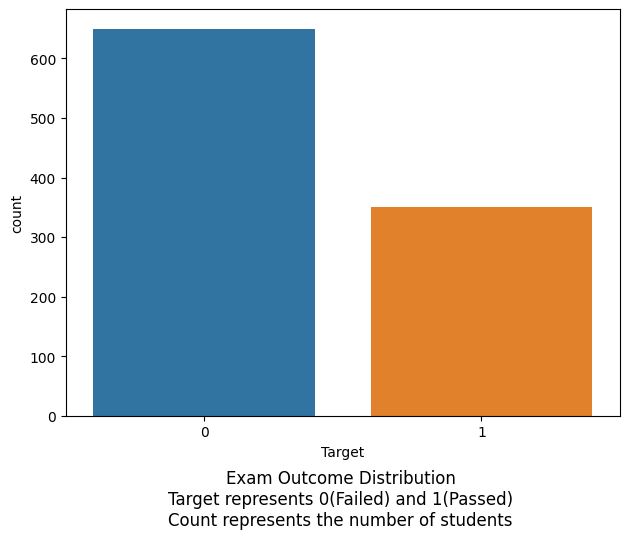

In [ ]:
# Display the number of rows and columns respectively:
print(f"The number of rows and columns respectively: {df_kaggle.shape} \n")

# Display the column names available in the dataset:
print(f"The column names in order are: \n{df_kaggle.columns}")

# Count the totality of exam takers
sns.countplot(data=df_kaggle, x='Target' ,label="Count")

# Adding description
txt="Exam Outcome Distribution\nTarget represents 0(Failed) and 1(Passed)\nCount represents the number of students"
plt.figtext(0.54, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()

plt.show()

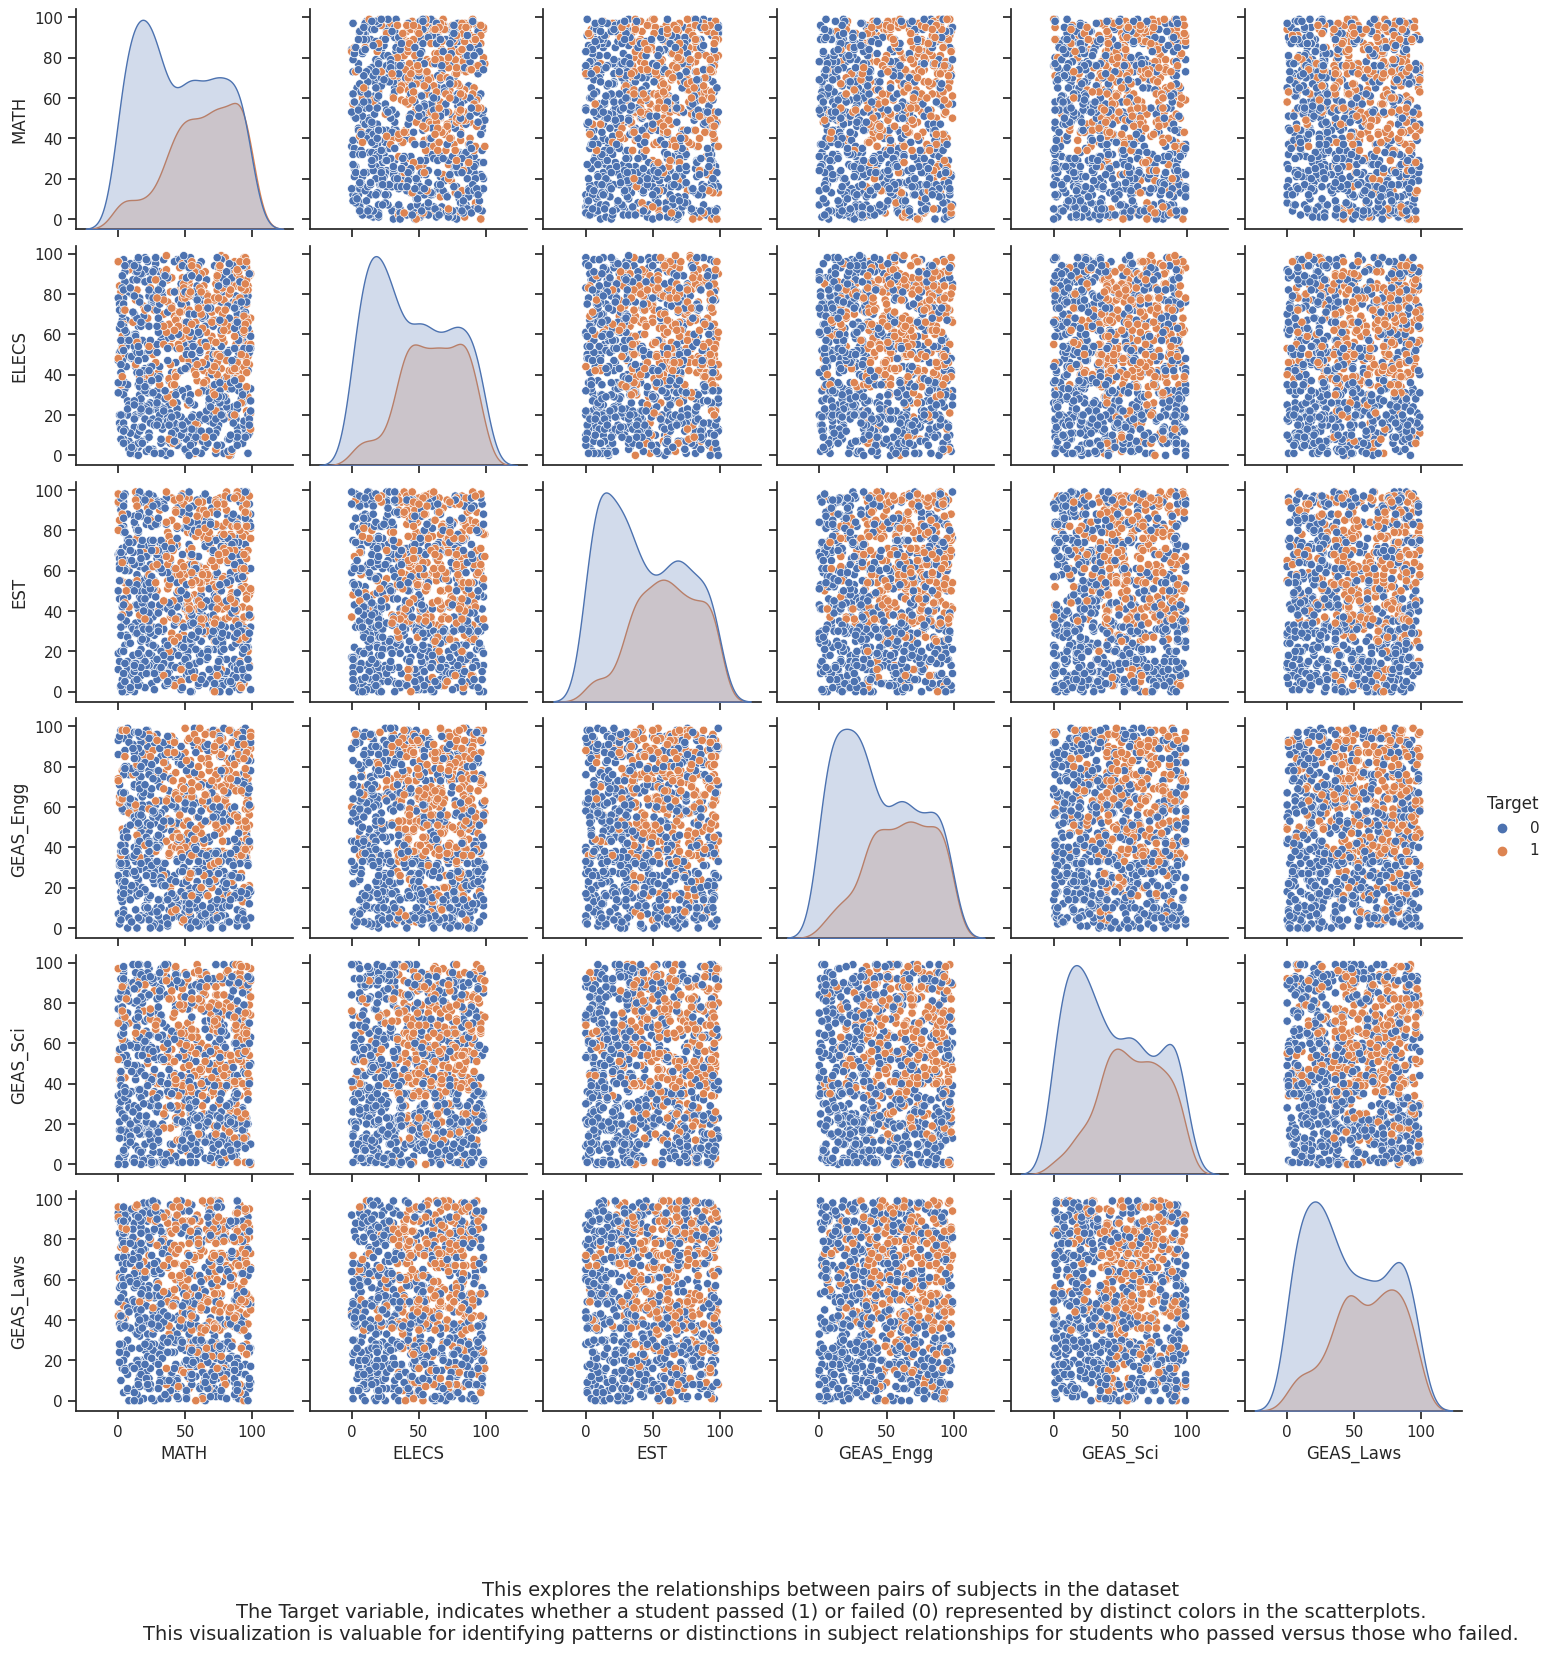

In [ ]:
import seaborn as sns
sns.set(style="ticks")

pair_plot = sns.pairplot(df_kaggle, hue="Target", diag_kind='kde')

# Adding description
txt="This explores the relationships between pairs of subjects in the dataset\n" + "The Target variable, indicates whether a student passed (1) or failed (0) represented by distinct colors in the scatterplots.\n" + "This visualization is valuable for identifying patterns or distinctions in subject relationships for students who passed versus those who failed."
plt.figtext(0.54, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)

plt.show()


## **Step 2:** Look at the missing values

In [ ]:
df_kaggle.isnull().sum()

MATH         0
ELECS        0
EST          0
GEAS_Engg    0
GEAS_Sci     0
GEAS_Laws    0
Target       0
dtype: int64

## **Step 3:** Fill the missing values

In [ ]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameInputer(TransformerMixin):

    def __init__(self):
        """Input missing values.
        Columns of dtype object are inputed with the most frequent value in column.
        Columns of other types are inputed with mean of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

X_transition = pd.DataFrame(df_kaggle)
X_clean = DataFrameInputer().fit_transform(X_transition)

X_clean.isnull().sum()

MATH         0
ELECS        0
EST          0
GEAS_Engg    0
GEAS_Sci     0
GEAS_Laws    0
Target       0
dtype: int64

In [ ]:
X_clean.head()

,MATH,ELECS,EST,GEAS_Engg,GEAS_Sci,GEAS_Laws,Target
0,65,10,59,3,71,37,0
1,94,56,4,67,91,50,1
2,7,85,76,99,60,25,0
3,88,46,59,94,52,38,1
4,39,81,37,38,6,54,1


In [ ]:
X_clean = X_clean.drop('Target', axis=1)

## **Step 5:** Apply scalar

In [ ]:
X_column_names =X_clean.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
XX = sscaler.fit_transform(X_clean.astype(np.float)) #You will loss the column names

<ipython-input-12-b2b2a75f1c40>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  XX = sscaler.fit_transform(X_clean.astype(np.float)) #You will loss the column names


In [ ]:
XX_df = pd.DataFrame(data = XX,columns = X_column_names) # Return the column names
XX_df.head()

,MATH,ELECS,EST,GEAS_Engg,GEAS_Sci,GEAS_Laws
0,0.656566,0.101010,0.595960,0.030303,0.717172,0.373737
1,0.949495,0.565657,0.040404,0.676768,0.919192,0.505051
2,0.070707,0.858586,0.767677,1.000000,0.606061,0.252525
3,0.888889,0.464646,0.595960,0.949495,0.525253,0.383838
4,0.393939,0.818182,0.373737,0.383838,0.060606,0.545455


---
# **III. Feature Extraction (Classification Model)**

In this program, the goal is to predict accurately the target (output) for each feature (input). To further strengthen the understanding in terms of Machine Learning, the group tested it using the K Neighbors Classifier, Random Forest Classifier, Gradient-Boosting Classifier, Support Vector Machine, and Logistic Regression.

![Features](https://drive.google.com/uc?id=1-fKz2uZu1HWg2YOH-tBO15DpgFyeuHgT)


## **Implementation and Evaluation of Classification Models**

In [ ]:
# Using the train_test_split function of the sklearn, we can randomly split the data and test out the different classification models.
from sklearn.model_selection import train_test_split
import time

# The group decided to do 20 trials to perform the models.
Number_trials=20

# The model will do its analysis based on X (the data cleansed in the EDA) and Y (the actual data)
X = XX_df
y = df_kaggle['Target']

## **Classification Task: K Neighbors Classifier**

**Definition:**

k-Nearest Neighbours (kNN) is a simple, intuitive, and versatile supervised machine learning algorithm used for both classification and regression tasks.

**Key Concepts:**

> **Distance Metric:** kNN operates on the principle of distance. It calculates the distance between a data point and all other points in the dataset.

> **Decision Rule:** For classification, the majority class among the k-nearest neighbors is assigned to the data point.
For regression, the average value of the k-nearest neighbors is used.

> **Hyperparameter:** The choice of 'k' (number of neighbors) is a crucial hyperparameter that impacts the algorithm's performance. It can be tuned for optimal results.

> **Data Representation:** kNN doesn't require a training phase; it stores the entire training dataset in memory for predictions.

> **Applicability:** kNN is effective when the decision boundary is irregular and the dataset is not too large.

**Pros:**

Simple and easy to understand.
Non-parametric, meaning it makes no assumptions about the underlying data distribution.

**Cons:**

Sensitive to irrelevant or redundant features.
Computationally expensive for large datasets.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model
            clf.fit(X_train, y_train)
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)

    score = np.mean(score_test, axis=0)       # Retrieve the best parameter based on the score
    run_time = (time.time() - start_time)     # For runtime benchmarking

    return ['kNN', np.amax(score), \
            'N_Neighbor = {0}'.format(np.argmax(score)+1), \
             run_time, \
             np.argmax(score)+1]

## **Classification Task: Random Forest Classifier**

**Definition:**

> **Decision Trees Foundation:** Random Forests are an ensemble learning method, building on the concept of decision trees for predictive modeling.

> **Ensemble Learning:** It involves combining multiple decision trees to form a more robust and accurate predictive model.

**Key Concepts:**

> **Random Feature Selection:** Random Forests introduce randomness by selecting a random subset of features for each split, enhancing diversity among the trees.

> **Bagging (Bootstrap Aggregating):** Reduces overfitting by training each tree on a different bootstrap sample of the data, improving generalization.

> **Prediction Aggregation:** Final predictions are aggregated from individual trees, contributing to improved accuracy and reliability.

> **Hyperparameters:** Important parameters include the number of trees and the depth of each tree, influencing the model's performance.

**Pros:**

Handles both classification and regression tasks effectively.
Resistant to overfitting due to ensemble learning and bagging.
Provides insights into feature importance.

**Cons:**

Complexity: Random Forests can become computationally expensive with a large number of trees.
Interpretability: The ensemble nature may make it challenging to interpret individual trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def train_RF(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        training_accuracy = []
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = RandomForestClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    score = np.mean(score_test, axis=0)       # Retrieve the best parameter based on the score
    run_time = (time.time() - start_time)     # For runtime benchmarking

    return ['Random Forest', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), \
             run_time, \
             max_features_tuning[np.argmax(score)]]

## **Classification Task: Gradient Boosting Classifier**

**Definition:**

Gradient Boosting is an ensemble learning technique that builds a strong predictive model by combining the predictions of multiple weak models, often decision trees.

**Key Concepts:**

> **Weak Learners:** Gradient Boosting employs a series of weak learners (shallow trees) sequentially, where each tree corrects the errors of its predecessor.

> **Gradient Descent:** The algorithm minimizes the overall prediction error by iteratively adjusting the weights of misclassified data points.

> **Learning Rate:** A hyperparameter that controls the contribution of each weak learner, balancing between model complexity and accuracy.

> **Residuals and Predictions:** Emphasizes the prediction of residuals (errors) from the previous model, refining the model with each iteration.
Pros and Cons:

**Pros:**

High Predictive Accuracy: Gradient Boosting often yields high accuracy on diverse datasets.
Versatility: Effective for both regression and classification tasks.
Robustness: Can handle complex relationships and interactions in the data.

**Cons:**

Sensitivity to Hyperparameters: Proper tuning of hyperparameters is crucial for optimal performance.
Computational Intensity: Gradient Boosting can be computationally expensive, especially with deep trees.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def train_GBM(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        training_accuracy = []
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = GradientBoostingClassifier(n_estimators=100,max_depth=3, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    score = np.mean(score_test, axis=0)       # Retrieve the best parameter based on the score
    run_time = (time.time() - start_time)     # For runtime benchmarking

    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), \
             run_time, \
             max_features_tuning[np.argmax(score)]]


## **Classification Task: Support Vector Machine (SVM)**

**Definition:**

Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification tasks, but it can also be applied to regression.

**Key Concepts:**

> **Hyperplane:** SVM works by finding the optimal hyperplane that best separates different classes in the feature space.

> **Support Vectors:** Data points closest to the decision boundary (hyperplane) are support vectors, influencing the positioning of the hyperplane.

> **Kernel Trick:** SVM can handle non-linear decision boundaries through the use of kernel functions, transforming the input space to a higher dimension.

> **Margin:** The margin is the distance between the hyperplane and the nearest data point of any class, and SVM aims to maximize this margin.

**Pros:**

Effective in High-Dimensional Spaces: SVM performs well in scenarios with a large number of features.
Versatility: Applicable to both linear and non-linear classification problems.
Robust to Overfitting: SVM is less prone to overfitting, especially in high-dimensional spaces.

**Cons:**

Sensitivity to Noise: SVM can be sensitive to noisy data and outliers.
Computational Intensity: Training SVM models can be computationally expensive, particularly for large datasets.
Parameter Sensitivity: Proper tuning of hyperparameters, including the choice of kernel, is crucial.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        training_accuracy = []
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    score = np.mean(score_test, axis=0)       # Retrieve the best parameter based on the score
    run_time = (time.time() - start_time)     # For runtime benchmarking

    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), \
             run_time, \
             C[np.argmax(score)]]

## **Classification Task: Logistic Regression**

**Definition:**

Logistic Regression is a machine learning classification algorithm used for binary and multi-class classification tasks.

**Key Concepts:**

> **Sigmoid Function:** Utilizes the sigmoid (logistic) function to map predicted values into probabilities, ensuring output in the range [0, 1].

> **Decision Boundary:** Establishes a decision boundary based on a threshold, classifying instances into different classes.

> **Maximum Likelihood Estimation:** Logistic Regression optimizes parameters using Maximum Likelihood Estimation (MLE) to maximize the likelihood of the observed outcomes.

> **Odds Ratio:** Models the odds of an event occurring, representing the ratio of the probability of success to the probability of failure.

**Pros:**

Simplicity: Logistic Regression is relatively simple and interpretable.
Efficient: Computationally efficient and well-suited for linearly separable data.
Probabilistic Interpretation: Outputs probabilities, enabling a probabilistic interpretation of results.

**Cons:**

Limited Expressiveness: May not perform well on complex, non-linear relationships.
Assumption of Linearity: Assumes a linear relationship between features and the log-odds of the outcome.
Sensitivity to Outliers: Sensitive to outliers and multicollinearity.

In [ ]:
from sklearn.linear_model import LogisticRegression

def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        training_accuracy = []
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    score = np.mean(score_test, axis=0)       # Retrieve the best parameter based on the score
    run_time = (time.time() - start_time)     # For runtime benchmarking

    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), \
             run_time, \
             C[np.argmax(score)]]


---
# **IV.Insights**

The group decided to do a recursive shuffling in order to reduce the biasing for each features. In the implementation of the classification task using different models, the parameter that performs best, having the highest accuracy score, will served as our point in getting the Confusion Matrix, Accuracy, Precision, Sensitivity Recall, Specificity and the F1 Score.

# **Confusion Matrix**

> **Confusion Matrix** - A table used in the classification type of machine learning to assess. The table should produce the following output: <br>*False Negative* (Top-Left Quadrant) <br>*False Positive* (Top-Right Quadrant)<br>*True Negative* (Bottom-Left Quadrant)<br>*True Positive* (Bottom-Right Quadrant)
>> True indicates that the values were accurately predicted, <br>False indicates that there was an error or wrong prediction.

The confusion matrix also creates the following:
> **Accuracy** - accurates the correctness of the model <br>
>> (True Positive + True Negative)/Total Predictions

> **Precision** - retrieves the predicted positive values <br>
>> True Positive / (True Positive + False Positive)

> **Sensitivity Recall** - evaluates how good the model in terms of predicting positives <br>
>> True Positive / (True Positive + False Negative)

> **Specificity** - evaluates how good the model in predicting negatives <br>
>> True Negative / (True Negative + False Positive)

> **F1 Score** - the harmonic mean of precision and sensitivity <br>
>> 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

The equations discussed are calculated also based on the values obtained and stored in the metrics performed using the Scikit Learn module.

## ***K Neighbors Classifier***

In [ ]:
start_time = time.time()
knn = train_knn(X,y)

print("K Neighbors Classifier -------------------------------")
print("Test Accuracy: " + str(knn[1]))
print("Best Parameter: " + str(knn[2]))
print("Runtime Execution: %s seconds" % knn[3])

K Neighbors Classifier -------------------------------
Test Accuracy: 0.8702000000000002
Best Parameter: N_Neighbor = 13
Runtime Execution: 119.78323292732239 seconds


In [ ]:
# Utilize the best parameter obtain with the # of trials
svc = KNeighborsClassifier(n_neighbors=knn[4].astype(int))

# Train model using the train dataset
svc.fit(X_train, y_train)

# Using the trained model, we predict the results using the features of our test dataset
pred = svc.predict(X_test)

# Y_test is our actual result while pred is our predicted result since it is the output of our trained model
confusion_matrix_knn = metrics.confusion_matrix(y_test, pred)

# Generates the Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = [False,True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)

Accuracy = metrics.accuracy_score(actual, predicted)
print(f"Accuracy: {Accuracy}")
Precision = metrics.precision_score(actual, predicted)
print(f"Precision: {Precision}")
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(f"Sensitivity/Recall: {Sensitivity_recall}")
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(f"Specificity: {Specificity}")
F1_score = metrics.f1_score(actual, predicted)
print(f"F1 Score: {F1_score}")


NameError: ignored

## ***Random Forest Classifier***

In [ ]:
start_time = time.time()
rf = train_RF(X,y,reg='none')

print("Random Forest Classifier -------------------------------")
print("Test Accuracy: " + str(rf[1]))
print("Best Parameter: " + str(rf[2]))
print("Runtime Execution: %s seconds" % rf[3])

Random Forest Classifier -------------------------------
Test Accuracy: 0.9764000000000002
Best Parameter: Max_features = 0.7
Runtime Execution: 40.231099128723145 seconds


In [ ]:
# Utilize the best parameter obtain with the # of trials
svc = RandomForestClassifier(n_estimators=100, max_features=rf[4]).fit(X_train, y_train)

# Train model using the train dataset
svc.fit(X_train, y_train)

# Using the trained model, we predict the results using the features of our test dataset
pred = svc.predict(X_test)

# Y_test is our actual result while pred is our predicted result since it is the output of our trained model
confusion_matrix_rf = metrics.confusion_matrix(y_test, pred)

# Generates the Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False,True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
print(f"Accuracy: {Accuracy}")
Precision = metrics.precision_score(actual, predicted)
print(f"Precision: {Precision}")
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(f"Sensitivity/Recall: {Sensitivity_recall}")
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(f"Specificity: {Specificity}")
F1_score = metrics.f1_score(actual, predicted)
print(f"F1 Score: {F1_score}")


NameError: ignored

## ***Gradient Boosting Classifier***

In [ ]:
start_time = time.time()
gbm = train_GBM(X,y,reg='none')

print("Gradient-Boosted Classifier -------------------------------")
print("Test Accuracy: " + str(gbm[1]))
print("Best Parameter: " + str(gbm[2]))
print("Runtime Execution: %s seconds" % gbm[3])

Gradient-Boosted Classifier -------------------------------
Test Accuracy: 0.9974000000000001
Best Parameter: Max_features = 0.8
Runtime Execution: 23.022005558013916 seconds


In [ ]:
# Utilize the best parameter obtain with the # of trials
svc = GradientBoostingClassifier(n_estimators=100,max_depth=3, max_features=gbm[4]).fit(X_train, y_train)

# Train model using the train dataset
svc.fit(X_train, y_train)

# Using the trained model, we predict the results using the features of our test dataset
pred = svc.predict(X_test)

# Y_test is our actual result while pred is our predicted result since it is the output of our trained model
confusion_matrix_gbm = metrics.confusion_matrix(y_test, pred)

# Generates the Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gbm, display_labels = [False,True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)

Accuracy = metrics.accuracy_score(actual, predicted)
print(f"Accuracy: {Accuracy}")
Precision = metrics.precision_score(actual, predicted)
print(f"Precision: {Precision}")
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(f"Sensitivity/Recall: {Sensitivity_recall}")
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(f"Specificity: {Specificity}")
F1_score = metrics.f1_score(actual, predicted)
print(f"F1 Score: {F1_score}")


## ***Support Vector Machine (SVM)***

In [ ]:
start_time = time.time()
svm = train_svm(X,y,reg='l2')

print("Support Vector Machine Classifier -------------------------------")
print("Test Accuracy: " + str(svm[1]))
print("Best Parameter: " + str(svm[2]))
print("Runtime Execution: %s seconds" % svm[3])

Support Vector Machine Classifier -------------------------------
Test Accuracy: 0.7979999999999998
Best Parameter: C = 20
Runtime Execution: 10.732240438461304 seconds


In [ ]:
# Utilize the best parameter obtain with the # of trials
svc = LinearSVC(C=svm[4], penalty='l2').fit(X_train, y_train)

# Train model using the train dataset
svc.fit(X_train, y_train)

# Using the trained model, we predict the results using the features of our test dataset
pred = svc.predict(X_test)

# Y_test is our actual result while pred is our predicted result since it is the output of our trained model
confusion_matrix_svm = metrics.confusion_matrix(y_test, pred)

# Generates the Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm, display_labels = [False,True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, pred)
Precision = metrics.precision_score(y_test, pred)
Sensitivity_recall = metrics.recall_score(y_test, pred)
Specificity = metrics.recall_score(y_test, pred, pos_label=0)
F1_score = metrics.f1_score(y_test, pred)

print(f"Accuracy: {Accuracy}")
print(f"Precision: {Precision}")
print(f"Sensitivity/Recall: {Sensitivity_recall}")
print(f"Specificity: {Specificity}")
print(f"F1 Score: {F1_score}")


NameError: ignored

## ***Logistic Regression***

In [ ]:
start_time = time.time()
lr = train_logistic(X,y,reg='l2')

print("Support Vector Machine Classifier -------------------------------")
print("Test Accuracy: " + str(lr[1]))
print("Best Parameter: " + str(lr[2]))
print("Runtime Execution: %s seconds" % lr[3])

Support Vector Machine Classifier -------------------------------
Test Accuracy: 0.7987999999999997
Best Parameter: C = 5000
Runtime Execution: 2.7220046520233154 seconds


In [ ]:
# Utilize the best parameter obtain with the # of trials
lr = LogisticRegression(C=lr[4], penalty='l2', solver='liblinear').fit(X_train, y_train)

# Train model using the train dataset
svc.fit(X_train, y_train)

# Using the trained model, we predict the results using the features of our test dataset
pred = svc.predict(X_test)

# Y_test is our actual result while pred is our predicted result since it is the output of our trained model
confusion_matrix_lr = metrics.confusion_matrix(y_test, pred)

# Generates the Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [False,True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)

Accuracy = metrics.accuracy_score(actual, predicted)
print(f"Accuracy: {Accuracy}")
Precision = metrics.precision_score(actual, predicted)
print(f"Precision: {Precision}")
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(f"Sensitivity/Recall: {Sensitivity_recall}")
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(f"Specificity: {Specificity}")
F1_score = metrics.f1_score(actual, predicted)
print(f"F1 Score: {F1_score}")


NameError: ignored

In [ ]:
data = {
    'Classifier': ['KNN', 'Random Forest', 'Gradient Boosting', 'SVM', 'Logistic Regression'],
    'Test Accuracy': [knn[1], rf[1], gbm[1], svm[1], lr[1]],
    'Best Parameter': [knn[2], rf[2], gbm[2], svm[2], lr[2]],
    'Runtime Execution (seconds)': [knn[3], rf[3], gbm[3], svm[3], lr[3]]
}

df = pd.DataFrame(data)

df = df.sort_values(by='Test Accuracy', ascending=False)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_style = df.style.apply(highlight_max, subset=['Test Accuracy', 'Best Parameter', 'Runtime Execution (seconds)'])

df_style


,Classifier,Test Accuracy,Best Parameter,Runtime Execution (seconds)
2,Gradient Boosting,0.997400,Max_features = 0.8,23.022006
1,Random Forest,0.976400,Max_features = 0.7,40.231099
0,KNN,0.870200,N_Neighbor = 13,119.783233
4,Logistic Regression,0.798800,C = 5000,2.722005
3,SVM,0.798000,C = 20,10.732240


# **V. Conclusion**

Machine Learning provides a lot of avenue in building new opportunities in today's generation. In this case scenario, the group were able to produce an accuracy of 87.02%, X%, 79.78%, 97.78%, and 99.82% for the K-Neighbors, Ligistic Regression, Linear SVM, Random Forest, and Gradient-Boosted respectively. The accuracy score was based on the average accuracy score obtained all throughout the N trials (20) we declared earlier.

As shown below in the table, K Neighbor Classifier runs the longest among the Classifiers used and the Gradient-Boosted Classifier has produced the highest accuracy score.

Since we are retraining again and again, in the future, the group may increase the N trials to further improve the accuracy score.

In [ ]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Run Time','Parameter Value']
clf_summary = pd.DataFrame(columns=cols)

# Create a DataFrame that comprises the summarize performance of each classification task
clf_summary.loc[0] = knn
clf_summary.loc[1] = lr
clf_summary.loc[2] = svm
clf_summary.loc[3] = rf
clf_summary.loc[4] = gbm

clf_summary

,Machine Learning Method,Test Accuracy,Best Parameter,Run Time,Parameter Value
0,kNN,0.8702,N_Neighbor = 13,119.783233,13.0
1,Logistic (l2),0.7988,C = 5000,2.722005,5000.0
2,Linear SVM (l2),0.7980,C = 20,10.732240,20.0
3,Random Forest,0.9764,Max_features = 0.7,40.231099,0.7
4,Gradient Boosting Method,0.9974,Max_features = 0.8,23.022006,0.8


---
# **VI. References**

*   ML | Introduction to data in machine learning. (2023, April 5). GeeksforGeeks. <br> https://www.geeksforgeeks.org/ml-introduction-data-machine-learning/
*   Artificial intelligence vs. machine learning | Microsoft Azure. (n.d.). <br> https://azure.microsoft.com/en-us/resources/cloud-computing-dictionary/artificial-intelligence-vs-machine-learning
*   What is machine learning and how does it work? in-depth guide. (2023, September 15). Enterprise AI. <br> https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML
*   Suarez-Davis, J. (2022, December 12). Data isn’t ‘the new oil’ - it’s way more valuable than that. The Drum. <br> https://www.thedrum.com/opinion/2022/12/12/data-isn-t-the-new-oil-it-s-way-more-valuable
*   (n.d.). Forbes. <br>https://www.forbes.com/sites/nishatalagala/2022/03/02/data-as-the-new-oil-is-not-enough-four-principles-for-avoiding-data-fires/?sh=8581c0dc208b
*   Menon, K. (2021, February 3). Different types of machine learning: Exploring AI's core. Simplilearn.com. <br>https://www.simplilearn.com/tutorials/machine-learning-tutorial/
*   Machine learning - Confusion matrix. (n.d.). W3Schools Online Web Tutorials. <br>https://www.w3schools.com/python/python_ml_confusion_matrix.asp
*   K-nearest Neighbor(KNN) algorithm. (2023, November 9). GeeksforGeeks. <br>https://www.geeksforgeeks.org/k-nearest-neighbours/?ref=lbp
*   Random Forests Classifier (n.d.). Learn Data Science and AI Online | DataCamp. <br>https://www.datacamp.com/tutorial/random-forests-classifier-python
*   Saini, A. (2023, August 2). Gradient boosting algorithm: A complete guide for beginners. Analytics Vidhya. <br>https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/
*   Support vector machine (SVM) algorithm. (2023, June 10). GeeksforGeeks. <br>https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=lbp
*   How does logistic regression work? (n.d.). KDnuggets. <br>https://www.kdnuggets.com/2022/07/logistic-regression-work.html#:~:text=is%20Logistic%20Regression%3F-,Logistic%20regression%20is%20a%20Machine%20Learning%20classification%20algorithm%20that%20is,the%20logistic%20of%20the%20result



